In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
digits = load_digits()

X_scaled = (digits.data - np.min(digits.data))/(np.max(digits.data) - np.min(digits.data))

X = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.nn.functional.one_hot(torch.tensor(digits.target, dtype=torch.long)).float()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [59]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, n_inputs, n_hidden, n_outputs):
        super().__init__()
        self.layer1 = torch.nn.Linear(n_inputs, n_hidden)
        self.layer2 = torch.nn.Linear(n_hidden, n_outputs)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x
    
class ConvNet(torch.nn.Module):
    def __init__(self, n_hidden, n_outputs):
        super().__init__()
        self.conv2d = torch.nn.Conv2d(1, n_hidden, kernel_size=(8,1))
        self.flatten = torch.nn.Flatten()
        self.fc = torch.nn.Linear(128, n_outputs)
        
    def forward(self, x):
        x = self.conv2d(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x
    
    
model = NeuralNetwork(64, 16, 10)

model_cnn = ConvNet(16, 10)

loss_criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        optimizer.zero_grad()
        #y_pred = model(X_train[i])
        y_pred = model_cnn(torch.reshape(X_train[i], (8,8)).unsqueeze(0).unsqueeze(0)) 
        loss = loss_criterion(y_pred[0], y_train[i])
        loss.backward()
        optimizer.step()

In [60]:
for k in range(10):
    print(torch.argmax(y_test[k]), torch.argmax(model_cnn(X_test[k].reshape((8,8)).unsqueeze(0).unsqueeze(0))))

tensor(9) tensor(9)
tensor(9) tensor(9)
tensor(4) tensor(4)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(3) tensor(3)
tensor(8) tensor(8)
tensor(5) tensor(5)


In [61]:
model.eval()

neuron_index = 3

learning_rate = 0.1
num_iterations = 1000

images = []

for k in range(10):
    input_tensor = torch.randn(1, 1, 8, 8, requires_grad=True)
    #input_tensor = input_tensor.reshape((8,8)).unsqueeze(0).unsqueeze(0)
    
    for i in range(num_iterations):
        output = model_cnn(input_tensor)
        output[0][k].backward()
        input_tensor.data += learning_rate * input_tensor.grad.data
        input_tensor.grad.zero_()
        
    img = input_tensor.detach().numpy().reshape((8, 8))
    img = (img - np.min(img))/(np.max(img) - np.min(img))*256
    
    images.append(img)

(tensor([[  282.0166, -1184.1260, -4813.4902,  -229.7987, -3921.3711,   928.8403,
          -6187.5757,  -386.2816,  1655.4132, 12783.9941]],
        grad_fn=<AddmmBackward0>),
 tensor([ 0.3266,  0.1673, -0.4898, -0.7806,  0.4027, -0.5717,  0.0797, -0.2479,
          0.3213,  0.4039], grad_fn=<AddBackward0>))

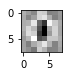

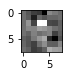

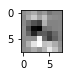

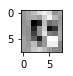

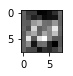

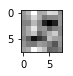

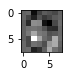

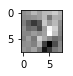

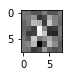

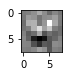

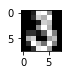

In [77]:
for i in range(len(images)):
    fig = plt.figure(figsize=(0.75, 10))
    fig.add_subplot(10, 1, i+1)
    plt.imshow(images[i], cmap="gray")
plt.figure(figsize=(0.75,0.75))
plt.imshow(X_train[38].detach().numpy().reshape((8,8)), cmap="gray")

model_cnn(input_tensor), model(X_train[38])